<a href="https://colab.research.google.com/github/hasnanurh/Sentiment-Analysis-Random-Forest/blob/master/18102124_Hasna_Nur_Hanifah_Sentimen_Analisis_Ponpapua_w_Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Sentiment Analysis Pon Papua Using Random Forest**

### **Preparing Dataset**

In [ ]:
import pandas as pd
# Creating a pandas dataframe from reviews.txt file
df_tweet = pd.read_csv('#Ponpapua.csv')
df_tweet

,Unnamed: 0,id,conversation_id,created_at,date,timezone,place,tweet,language,hashtags,cashtags,user_id,user_id_str,username,name,day,hour,link,urls,photos,video,thumbnail,retweet,nlikes,nreplies,nretweets,quote_url,search,near,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,0,1451795919641276419,1451795919641276419,1.634970e+12,2021-10-23 06:21:34,0,NaN,Pemkot Bandung Akan Beri Bonus Atlet PON Papua...,in,['ponpapua'],[],154102750,154102750,Beritasatu,BeritaSatu,6,6,https://twitter.com/Beritasatu/status/14517959...,['https://www.beritasatu.com/nasional/844493/p...,[],0,NaN,False,2,0,0,NaN,#Ponpapua,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
1,1,1451756385159430147,1451756385159430147,1.634961e+12,2021-10-23 03:44:29,0,NaN,#PONpapua #PONPapua2021 #PONXXPapua2021 #PONPa...,und,"['ponpapua', 'ponpapua2021', 'ponxxpapua2021',...",[],1237208794251198465,1237208794251198465,Muhamad75773477,Durenmedan,6,3,https://twitter.com/Muhamad75773477/status/145...,[],[],1,https://pbs.twimg.com/ext_tw_video_thumb/14517...,False,0,0,0,NaN,#Ponpapua,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
2,2,1451756137192169479,1451756137192169479,1.634961e+12,2021-10-23 03:43:30,0,NaN,#PONpapua #PONPapua2021 #PONXXPapua2021 #PONPa...,und,"['ponpapua', 'ponpapua2021', 'ponxxpapua2021',...",[],1237208794251198465,1237208794251198465,Muhamad75773477,Durenmedan,6,3,https://twitter.com/Muhamad75773477/status/145...,[],['https://pbs.twimg.com/media/FCWsgfmVUAA_R1x....,1,https://pbs.twimg.com/media/FCWsgfmVUAA_R1x.jpg,False,0,0,0,NaN,#Ponpapua,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
3,3,1451756063707963393,1451756063707963393,1.634961e+12,2021-10-23 03:43:12,0,NaN,#PONpapua #PONPapua2021 #PONXXPapua2021 #PONPa...,und,"['ponpapua', 'ponpapua2021', 'ponxxpapua2021',...",[],1237208794251198465,1237208794251198465,Muhamad75773477,Durenmedan,6,3,https://twitter.com/Muhamad75773477/status/145...,[],['https://pbs.twimg.com/media/FCWscKiVQAY91SY....,1,https://pbs.twimg.com/media/FCWscKiVQAY91SY.jpg,False,0,0,0,NaN,#Ponpapua,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
4,4,1451755989892435978,1451755989892435978,1.634961e+12,2021-10-23 03:42:54,0,NaN,#PONpapua #PONPapua2021 #PONXXPapua2021 #PONPa...,und,"['ponpapua', 'ponpapua2021', 'ponxxpapua2021',...",[],1237208794251198465,1237208794251198465,Muhamad75773477,Durenmedan,6,3,https://twitter.com/Muhamad75773477/status/145...,[],['https://pbs.twimg.com/media/FCWsX5FVcAIksyj....,1,https://pbs.twimg.com/media/FCWsX5FVcAIksyj.jpg,False,0,0,0,NaN,#Ponpapua,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
503,503,1448899881557377032,1448899881557377032,1.634280e+12,2021-10-15 06:33:45,0,NaN,Su senang Kami bawa Emas Cabang bola kaki. @po...,in,"['ponxxpapua2021', 'ponpapua2021', 'ponpapua',...",[],1435984419655872516,1435984419655872516,alexandrobon,Alexandrobonai,5,6,https://twitter.com/alexandrobon/status/144889...,[],['https://pbs.twimg.com/media/FBuGwK6VgAQA8zD....,1,https://pbs.twimg.com/media/FBuGwK6VgAQA8zD.jpg,False,0,0,0,NaN,#Ponpapua,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
504,504,1448899618486448131,1448899618486448131,1.634280e+12,2021-10-15 06:32:42,0,NaN,Event Terbaik dan Tak akan Pernah Terlupakan #...,in,"['ponxxpapua2021', 'ponpapua2021', 'ponxxpapua...",[],1436237553464532993,1436237553464532993,FebriyaniPaula,Paula Febriyani,5,6,https://twitter.com/FebriyaniPaula/status/1448...,[],['https://pbs.twimg.com/media/FBuGhWEVIAcfpCE....,1,https://pbs.twimg.com/media/FBuGhWEVIAcfpCE.jpg,False,2,0,2,NaN,#Ponpapua,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
505,505,1448899593593184262,1448899593593184262,1.634280e+12,2021-10-15 06:32:37,0,NaN,Su senang Kami bawa Emas Cabang bola kaki. . ....,in,"['ponxxpapua2021', 'ponpapua2021', 'ponpapua',...",[],1434370902599163906,1434370902599163906,Cornellordh,Cornelius,5,6,https:

In [ ]:
#Select column except 'tweet'
delete_data = df_tweet.loc[:, df_tweet.columns != "tweet"]
delete_data.columns

Index(['Unnamed: 0', 'id', 'conversation_id', 'created_at', 'date', 'timezone',
       'place', 'language', 'hashtags', 'cashtags', 'user_id', 'user_id_str',
       'username', 'name', 'day', 'hour', 'link', 'urls', 'photos', 'video',
       'thumbnail', 'retweet', 'nlikes', 'nreplies', 'nretweets', 'quote_url',
       'search', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')

In [ ]:
# Dropping column
mydata = df_tweet.drop(delete_data.columns, axis=1)
mydata

,tweet
0,Pemkot Bandung Akan Beri Bonus Atlet PON Papua...
1,#PONpapua #PONPapua2021 #PONXXPapua2021 #PONPa...
2,#PONpapua #PONPapua2021 #PONXXPapua2021 #PONPa...
3,#PONpapua #PONPapua2021 #PONXXPapua2021 #PONPa...
4,#PONpapua #PONPapua2021 #PONXXPapua2021 #PONPa...
...,...
503,Su senang Kami bawa Emas Cabang bola kaki. @po...
504,Event Terbaik dan Tak akan Pernah Terlupakan #...
505,Su senang Kami bawa Emas Cabang bola kaki. . ....
506,Penjagaan dan Pelaksanaan Ekstra untuk Event P...


### **Preprocessing**

### Step 1 : Cleaning the Text

In [ ]:
import re
import string

# Define a function to clean the text
def clean(text):
 # Removes all special characters and numericals leaving the alphabets
 text = re.sub(r'@[A-Za-z0-9]+', '', text) # remove mentions
 text = re.sub(r'#[A-Za-z0-9]+', '', text) # remove hashtag
 text = re.sub(r'RT[\s]', '', text) # remove RT
 text = re.sub(r"http\S+", '', text) # remove link
 text = re.sub(r'[0-9]+', '', text) # remove numbers

 text = text.replace('\n', ' ') # replace new line into space
 text = text.translate(str.maketrans('', '', string.punctuation)) # remove all punctuations
 text = text.strip(' ') # remove characters space from both left and right text
 return text
# Cleaning the text in the review column
mydata['Cleaned Reviews'] = mydata['tweet'].apply(clean)
mydata

,tweet,Cleaned Reviews
0,Pemkot Bandung Akan Beri Bonus Atlet PON Papua...,Pemkot Bandung Akan Beri Bonus Atlet PON Papua...
1,#PONpapua #PONPapua2021 #PONXXPapua2021 #PONPa...,tv
2,#PONpapua #PONPapua2021 #PONXXPapua2021 #PONPa...,tv
3,#PONpapua #PONPapua2021 #PONXXPapua2021 #PONPa...,tv
4,#PONpapua #PONPapua2021 #PONXXPapua2021 #PONPa...,tv
...,...,...
503,Su senang Kami bawa Emas Cabang bola kaki. @po...,Su senang Kami bawa Emas Cabang bola kaki
504,Event Terbaik dan Tak akan Pernah Terlupakan #...,Event Terbaik dan Tak akan Pernah Terlupakan
505,Su senang Kami bawa Emas Cabang bola kaki. . ....,Su senang Kami bawa Emas Cabang bola kaki
506,Penjagaan dan Pelaksanaan Ekstra untuk Event P...,Penjagaan dan Pelaksanaan Ekstra untuk Event P...


### Steps 2-4: CaseFolding, Tokenization, POS tagging, stopwords removal

In [ ]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from nltk.tokenize import word_tokenize
from nltk import pos_tag
nltk.download('stopwords')
from nltk.corpus import stopwords
nltk.download('wordnet')
from nltk.corpus import wordnet
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
!pip install Sastrawi
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from wordcloud import WordCloud

def casefoldingText(text): # Converting all the characters in a text into lower case
    text = text.lower() 
    return text

def tokenizingText(text): # Tokenizing or splitting a string, text into a list of tokens
    text = word_tokenize(text) 
    return text

# POS tagger dictionary
pos_dict = {'J':wordnet.ADJ, 'V':wordnet.VERB, 'N':wordnet.NOUN, 'R':wordnet.ADV}
def token_stop_pos(text):
 tags = pos_tag(word_tokenize(text))
 newlist = []
 for word, tag in tags:
  if word.lower() not in set(stopwords.words('english')):
    newlist.append(tuple([word, pos_dict.get(tag[0])]))
 return newlist


def filteringText(text): # Remove stopwors in a text
    listStopwords = set(stopwords.words('indonesian'))
    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)
    text = filtered 
    return text
    
def toSentence(list_words): # Convert list of words into sentence
    sentence = ' '.join(word for word in list_words)
    return sentence

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

     |████████████████████████████████| 209 kB 6.8 MB/s 


In [ ]:
tweets = mydata

tweets['casefoldingText'] = tweets['Cleaned Reviews'].apply(casefoldingText)
tweets['tokenizingText'] = tweets['casefoldingText'].apply(tokenizingText)
tweets['POS tagged'] = tweets['casefoldingText'].apply(token_stop_pos)
tweets['filteringText'] = tweets['tokenizingText'].apply(filteringText)

In [ ]:
tweets.tail()

,tweet,Cleaned Reviews,casefoldingText,tokenizingText,POS tagged,filteringText,stemmingText,text_preprocessed,polarity_score,polarity
503,Su senang Kami bawa Emas Cabang bola kaki. @po...,Su senang Kami bawa Emas Cabang bola kaki,su senang kami bawa emas cabang bola kaki,"[su, senang, kami, bawa, emas, cabang, bola, k...","[(su, n), (senang, n), (kami, n), (bawa, n), (...","[su, senang, bawa, emas, cabang, bola, kaki]","[su, senang, bawa, emas, cabang, bola, kaki]",su senang bawa emas cabang bola kaki,-1,negative
504,Event Terbaik dan Tak akan Pernah Terlupakan #...,Event Terbaik dan Tak akan Pernah Terlupakan,event terbaik dan tak akan pernah terlupakan,"[event, terbaik, dan, tak, akan, pernah, terlu...","[(event, n), (terbaik, n), (dan, n), (tak, n),...","[event, terbaik, terlupakan]","[event, baik, lupa]",event baik lupa,0,neutral
505,Su senang Kami bawa Emas Cabang bola kaki. . ....,Su senang Kami bawa Emas Cabang bola kaki,su senang kami bawa emas cabang bola kaki,"[su, senang, kami, bawa, emas, cabang, bola, k...","[(su, n), (senang, n), (kami, n), (bawa, n), (...","[su, senang, bawa, emas, cabang, bola, kaki]","[su, senang, bawa, emas, cabang, bola, kaki]",su senang bawa emas cabang bola kaki,-1,negative
506,Penjagaan dan Pelaksanaan Ekstra untuk Event P...,Penjagaan dan Pelaksanaan Ekstra untuk Event P...,penjagaan dan pelaksanaan ekstra untuk event p...,"[penjagaan, dan, pelaksanaan, ekstra, untuk, e...","[(penjagaan, n), (dan, n), (pelaksanaan, n), (...","[penjagaan, pelaksanaan, ekstra, event, papua,...","[jaga, laksana, ekstra, event, papua, pandemi,...",jaga laksana ekstra event papua pandemi covid,-3,negative
507,Tim Cabang Olahraga Takraw Gorontalo yang berl...,Tim Cabang Olahraga Takraw Gorontalo yang berl...,tim cabang olahraga takraw gorontalo yang berl...,"[tim, cabang, olahraga, takraw, gorontalo, yan...","[(tim, n), (cabang, n), (olahraga, None), (tak...","[tim, cabang, olahraga, takraw, gorontalo, ber...","[tim, cabang, olahraga, takraw, gorontalo, lag...",tim cabang olahraga takraw gorontalo laga peka...,-9,negative


### Step 5: Obtaining the stem words

In [ ]:
def stemmingText(text): # Reducing a word to its word stem that affixes to suffixes and prefixes or to the roots of words
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()
    text = [stemmer.stem(word) for word in text]
    return text

In [ ]:
tweets['stemmingText'] = tweets['filteringText'].apply(stemmingText)
tweets['text_preprocessed'] = tweets['stemmingText'].apply(toSentence)

In [ ]:
tweets.tail()

,tweet,Cleaned Reviews,casefoldingText,tokenizingText,POS tagged,filteringText,stemmingText,text_preprocessed,polarity_score,polarity
503,Su senang Kami bawa Emas Cabang bola kaki. @po...,Su senang Kami bawa Emas Cabang bola kaki,su senang kami bawa emas cabang bola kaki,"[su, senang, kami, bawa, emas, cabang, bola, k...","[(su, n), (senang, n), (kami, n), (bawa, n), (...","[su, senang, bawa, emas, cabang, bola, kaki]","[su, senang, bawa, emas, cabang, bola, kaki]",su senang bawa emas cabang bola kaki,-1,negative
504,Event Terbaik dan Tak akan Pernah Terlupakan #...,Event Terbaik dan Tak akan Pernah Terlupakan,event terbaik dan tak akan pernah terlupakan,"[event, terbaik, dan, tak, akan, pernah, terlu...","[(event, n), (terbaik, n), (dan, n), (tak, n),...","[event, terbaik, terlupakan]","[event, baik, lupa]",event baik lupa,0,neutral
505,Su senang Kami bawa Emas Cabang bola kaki. . ....,Su senang Kami bawa Emas Cabang bola kaki,su senang kami bawa emas cabang bola kaki,"[su, senang, kami, bawa, emas, cabang, bola, k...","[(su, n), (senang, n), (kami, n), (bawa, n), (...","[su, senang, bawa, emas, cabang, bola, kaki]","[su, senang, bawa, emas, cabang, bola, kaki]",su senang bawa emas cabang bola kaki,-1,negative
506,Penjagaan dan Pelaksanaan Ekstra untuk Event P...,Penjagaan dan Pelaksanaan Ekstra untuk Event P...,penjagaan dan pelaksanaan ekstra untuk event p...,"[penjagaan, dan, pelaksanaan, ekstra, untuk, e...","[(penjagaan, n), (dan, n), (pelaksanaan, n), (...","[penjagaan, pelaksanaan, ekstra, event, papua,...","[jaga, laksana, ekstra, event, papua, pandemi,...",jaga laksana ekstra event papua pandemi covid,-3,negative
507,Tim Cabang Olahraga Takraw Gorontalo yang berl...,Tim Cabang Olahraga Takraw Gorontalo yang berl...,tim cabang olahraga takraw gorontalo yang berl...,"[tim, cabang, olahraga, takraw, gorontalo, yan...","[(tim, n), (cabang, n), (olahraga, None), (tak...","[tim, cabang, olahraga, takraw, gorontalo, ber...","[tim, cabang, olahraga, takraw, gorontalo, lag...",tim cabang olahraga takraw gorontalo laga peka...,-9,negative


### **Determine Sentiment Polarity of Tweets with Indonesia Sentiment Lexicon**

In [ ]:
# Determine sentiment polarity of tweets using indonesia sentiment lexicon (source : https://github.com/fajri91/InSet)

# Loads lexicon positive and negative data
lexicon_positive = dict()
import csv
with open('lexicon_positive.csv', 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        lexicon_positive[row[0]] = row[1]

lexicon_negative = dict()
import csv
with open('lexicon_negative.csv', 'r') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        lexicon_negative[row[0]] = row[1]
        
# Function to determine sentiment polarity of tweets        
def sentiment_analysis_lexicon_indonesia(text):
    #for word in text:
    score = 0
    for word in text:
        if (word in lexicon_positive):
            score = score + int(lexicon_positive[word])
    for word in text:
        if (word in lexicon_negative):
            score = score + int(lexicon_negative[word])
    polarity=''
    if (score > 0):
        polarity = 'positive'
    elif (score < 0):
        polarity = 'negative'
    else:
        polarity = 'neutral'
    return score, polarity

In [ ]:
# Results from determine sentiment polarity of tweets

results = tweets['stemmingText'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
tweets['polarity_score'] = results[0]
tweets['polarity'] = results[1]
print(tweets['polarity'].value_counts())

positive    213
neutral     190
negative    105
Name: polarity, dtype: int64


<Figure size 720x504 with 0 Axes>

([<matplotlib.patches.Wedge at 0x7f46e54d6610>,
 [Text(0.27593018645818385, 1.0648298137266592, 'positive'),
  Text(-0.863637970183204, -0.6812704723219959, 'neutral'),
  Text(0.8761281186689697, -0.665131204859291, 'negative')],
 [Text(0.15050737443173665, 0.5808162620327232, '41.9%'),
  Text(-0.47107525646356574, -0.3716020758119977, '37.4%'),
  Text(0.47788806472852885, -0.36279883901415866, '20.7%')])

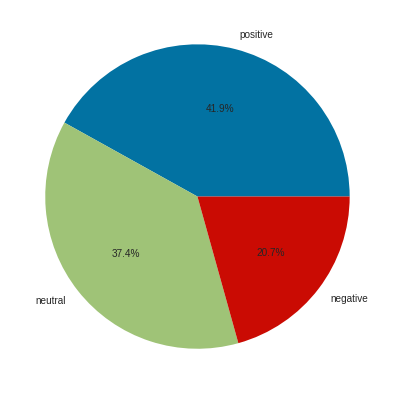

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

stw_counts= tweets['polarity'].value_counts()
plt.figure(figsize=(10, 7))
plt.pie(stw_counts.values, labels = stw_counts.index, autopct='%1.1f%%', shadow=False)
# plt.legend()

### **Word Cloud of Positive and Negative Words on Tweets Data**

In [ ]:
# Function to group all positive/negative words
def words_with_sentiment(text):
    positive_words=[]
    negative_words=[]
    for word in text:
        score_pos = 0
        score_neg = 0
        if (word in lexicon_positive):
            score_pos = int(lexicon_positive[word])
        if (word in lexicon_negative):
            score_neg = int(lexicon_negative[word])
        
        if (score_pos + score_neg > 0):
            positive_words.append(word)
        elif (score_pos + score_neg < 0):
            negative_words.append(word)
            
    return positive_words, negative_words

Text(0.5, 1.0, 'Word Cloud of Positive Words on Tweets Data \n (based on Indonesia Sentiment Lexicon)')

(-0.5, 799.5, 599.5, -0.5)

Text(0.5, 1.0, 'Word Cloud of Negative Words on Tweets Data \n (based on Indonesia Sentiment Lexicon)')

(-0.5, 799.5, 599.5, -0.5)

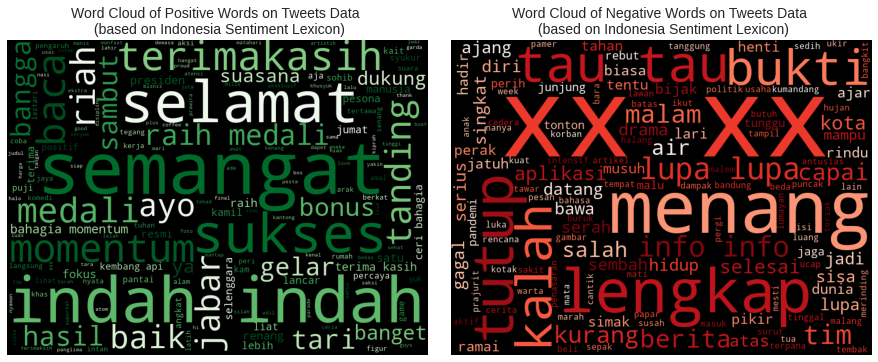

In [ ]:
# Visualize positive and Negative word cloud

sentiment_words = tweets['stemmingText'].apply(words_with_sentiment)
sentiment_words = list(zip(*sentiment_words))
positive_words = sentiment_words[0]
negative_words = sentiment_words[1]

fig, ax = plt.subplots(1, 2,figsize = (12, 10))
list_words_postive=''
for row_word in positive_words:
    for word in row_word:
        list_words_postive += ' '+(word)
wordcloud_positive = WordCloud(width = 800, height = 600, background_color = 'black', colormap = 'Greens'
                               , min_font_size = 10).generate(list_words_postive)
ax[0].set_title('Word Cloud of Positive Words on Tweets Data \n (based on Indonesia Sentiment Lexicon)', fontsize = 14)
ax[0].grid(False)
ax[0].imshow((wordcloud_positive))
fig.tight_layout(pad=0)
ax[0].axis('off')

list_words_negative=''
for row_word in negative_words:
    for word in row_word:
        list_words_negative += ' '+(word)
wordcloud_negative = WordCloud(width = 800, height = 600, background_color = 'black', colormap = 'Reds'
                               , min_font_size = 10).generate(list_words_negative)
ax[1].set_title('Word Cloud of Negative Words on Tweets Data \n (based on Indonesia Sentiment Lexicon)', fontsize = 14)
ax[1].grid(False)
ax[1].imshow((wordcloud_negative))
fig.tight_layout(pad=0)
ax[1].axis('off')

plt.show()

### **Sentiment Analysis Using Random Forest**

### Preparing Dataset

In [ ]:
df_tweets = tweets[['text_preprocessed', 'polarity']]
df_tweets = df_tweets.rename(columns={'polarity': 'sentiment'})
df_tweets = df_tweets.rename(columns={'text_preprocessed': 'tweet'})
df_tweets

,tweet,sentiment
0,pemkot bandung bonus atlet pon papua lengkap,negative
1,tv,neutral
2,tv,neutral
3,tv,neutral
4,tv,neutral
...,...,...
503,su senang bawa emas cabang bola kaki,negative
504,event baik lupa,neutral
505,su senang bawa emas cabang bola kaki,negative
506,jaga laksana ekstra event papua pandemi covid,negative


In [ ]:
#sentiment count
df_tweets['sentiment'].value_counts()

positive    213
neutral     190
negative    105
Name: sentiment, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



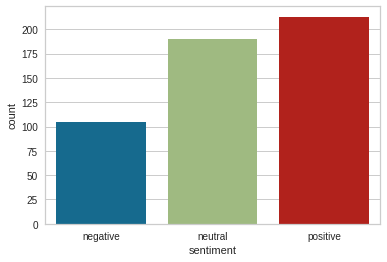

In [ ]:
import seaborn as sns
sns.countplot(df_tweets.sentiment)

### Handling Imbalance Dataset

In [ ]:
def oversample(df):
    import seaborn as sns
    classes = df.sentiment.value_counts().to_dict()
    most = max(classes.values())
    classes_list = []
    for key in classes:
        classes_list.append(df[df['sentiment'] == key]) 
    classes_sample = []
    for i in range(1,len(classes_list)):
        classes_sample.append(classes_list[i].sample(most, replace=True))
    df_maybe = pd.concat(classes_sample)
    final_df = pd.concat([df_maybe,classes_list[0]], axis=0)
    final_df = final_df.reset_index(drop=True)
    df_tweets = final_df
    
    return df_tweets

In [ ]:
df = oversample(df_tweets)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



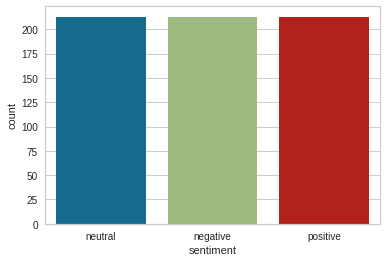

In [ ]:
sns.countplot(df.sentiment)

### Preprocessing Data Text

In [ ]:
from sklearn.model_selection import train_test_split

train,valid = train_test_split(df,test_size = 0.2,random_state=0,stratify = df.sentiment.values) #stratification means that the train_test_split method returns training and test subsets that have the same proportions of class labels as the input dataset.
print("train shape : ", train.shape)
print("valid shape : ", valid.shape)

train shape :  (511, 2)
valid shape :  (128, 2)


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
stop = list(stopwords.words('indonesian'))
vectorizer = CountVectorizer(decode_error = 'replace',stop_words = stop)

X_train = vectorizer.fit_transform(train.tweet.values)
X_valid = vectorizer.transform(valid.tweet.values)

y_train = train.sentiment.values
y_valid = valid.sentiment.values

print("X_train.shape : ", X_train.shape)
print("X_train.shape : ", X_valid.shape)
print("y_train.shape : ", y_train.shape)
print("y_valid.shape : ", y_valid.shape)

X_train.shape :  (511, 672)
X_train.shape :  (128, 672)
y_train.shape :  (511,)
y_valid.shape :  (128,)


/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning:

Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['baiknya', 'berkali', 'kali', 'kurangnya', 'mata', 'olah', 'sekurang', 'setidak', 'tama', 'tidaknya'] not in stop_words.



### Model Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

text_classifier = RandomForestClassifier(n_estimators=200, random_state=0)
text_classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [ ]:
predictions = text_classifier.predict(X_valid)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


print(confusion_matrix(y_valid,predictions))
rdforest_prediction = text_classifier.predict(X_valid)
rdforest_accuracy = accuracy_score(y_valid,rdforest_prediction)
print("Training accuracy Score    : ",text_classifier.score(X_train,y_train))
print("Validation accuracy Score : ",rdforest_accuracy )
print(classification_report(rdforest_prediction,y_valid))


[[40  2  1]
 [ 0 43  0]
 [ 1  8 33]]
Training accuracy Score    :  1.0
Validation accuracy Score :  0.90625
              precision    recall  f1-score   support

    negative       0.93      0.98      0.95        41
     neutral       1.00      0.81      0.90        53
    positive       0.79      0.97      0.87        34

    accuracy                           0.91       128
   macro avg       0.91      0.92      0.91       128
weighted avg       0.92      0.91      0.91       128



### **Prediction with Other Data**

In [ ]:
#Initializing and preprocessing new text data
otherData = pd.DataFrame()
otherData['text'] = ['Tetesan keringat bercucuran dan teriakan semangat bergema saat sejumlah atlet berlatih. Mereka menyiapkan fisik untuk menghadapi PON Papua dan banggakan negara.',
                     'SEMANGAT KAWAN SEMUA! #PeparnasPapua #PeparnasPapua2021 #PONXXPapua2021 #TorangBisa #PONPapua',
                     'Buzzernya Kalah Banyak, Tak Setuju Nagita Slavina Jadi Duta PON XX Papua, Dian Sastro Kena Bully Netizen https://jakpusnews.pikiran-rakyat.com/olahraga/pr-442001771/buzzernya-kalah-banyak-tak-setuju-nagita-slavina-jadi-duta-pon-xx-papua-dian-sastro-kena-bully-netizen #diansastro #ariekriting #PONXXPapua2021 #PONXX #PONPapua #Papua'
                    ]

otherData['text_clean'] = otherData['text'].apply(clean)
otherData['text_clean'] = otherData['text_clean'].apply(casefoldingText)
otherData.drop(['text'], axis = 1, inplace = True)

otherData['text_preprocessed'] = otherData['text_clean'].apply(tokenizingText)
otherData['text_preprocessed'] = otherData['text_preprocessed'].apply(filteringText)
otherData['text_preprocessed'] = otherData['text_preprocessed'].apply(stemmingText)
otherData

,text_clean,text_preprocessed
0,tetesan keringat bercucuran dan teriakan seman...,"[tetes, keringat, cucur, ria, semangat, gema, ..."
1,semangat kawan semua,"[semangat, kawan]"
2,buzzernya kalah banyak tak setuju nagita slavi...,"[buzzernya, kalah, tuju, nagita, slavina, duta..."


In [ ]:
# Preprocessing text data

# Make text preprocessed (tokenized) to untokenized with toSentence Function
X_otherData = otherData['text_preprocessed'].apply(toSentence)
X_otherData = vectorizer.transform(X_otherData.values)

In [ ]:
# Results from prediction sentiment on text data

y_pred_otherData = text_classifier.predict(X_otherData)
y_pred_otherData
otherData['Result Prediction'] = y_pred_otherData
otherData

array(['positive', 'positive', 'negative'], dtype=object)

,text_clean,text_preprocessed,Result Prediction
0,tetesan keringat bercucuran dan teriakan seman...,"[tetes, keringat, cucur, ria, semangat, gema, ...",positive
1,semangat kawan semua,"[semangat, kawan]",positive
2,buzzernya kalah banyak tak setuju nagita slavi...,"[buzzernya, kalah, tuju, nagita, slavina, duta...",negative
